In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,NaN,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
def scaled_data(df):
    sex,fbs,exang,target= np.array(df['sex']) ,np.array(df['fbs']),np.array(df['exang']),np.array(df['target'])
    dataset = np.stack([sex,fbs,exang,target])
    dataset = dataset.T
    dataset=np.random.permutation(dataset)
    dataset = dataset.T
    n = len(dataset[0])
    pct = int(n*0.8)
    x_train = dataset.T[:][:pct]
    y_train = dataset[3][:pct]
    x_test = dataset.T[:][pct:]
    y_test = dataset[3][pct:]
    x_train=np.delete(x_train.T,3,0)
    x_test=np.delete(x_test.T,3,axis=0)
    return x_train.T,y_train,x_test.T,y_test

In [5]:
x_train,y_train,x_test,y_test=scaled_data(df)

In [6]:
from sklearn import tree

In [7]:
model = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
def accuracy(x_test,y_test):
    cnt=0
    for i in range(len(x_test)):
        if(model.predict([x_test[i]])[0]==y_test[i]):
            cnt+=1
    return cnt/len(y_test)*100

In [10]:
accuracy(x_test,y_test)

72.1311475409836

In [11]:
import graphviz

In [12]:
dot_data = tree.export_graphviz(model, out_file=None,filled=True,feature_names=['sex','fbs','exang'],rounded=True,special_characters=True) 

In [13]:
graph = graphviz.Source(dot_data)

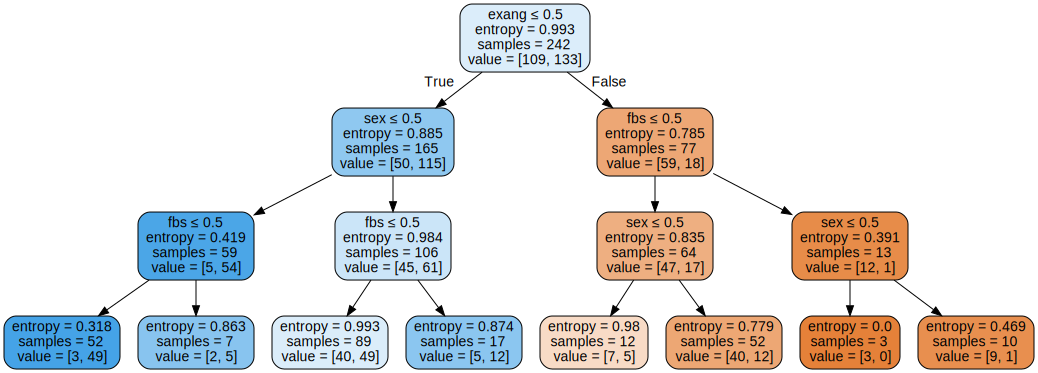

In [14]:
graph